<a href="https://colab.research.google.com/github/CapivaFranco/DSNP-3.0/blob/main/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [14]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2023-06-28/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem como objetivo analisar os dados que foram importados agora já estão em nosso ambiente.

**Dicionário das variáveis**

* id
* name
* host_id
* neighbourhood_group
* neighbourhood
* latitude
* longitude
* room_type
* price
* minimum_nights
* number_of_reviews
*last_review

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,17339,3,36,2023-05-13,0.27,1,208,8,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.78 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,7807,7,108,2023-04-20,0.81,6,261,11,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,7665,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,12738,2,46,2019-11-30,0.31,9,147,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,25660,2,283,2023-06-11,1.77,4,118,31,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0])) #df.shape[0] apresenta a quantidade de linhas
print("Variaveis:\t {}\n".format(df.shape[1])) #df.shape[1] apresenta a quantidade de colunas

# verificar as 5 primeiras entradas do dataset
display(df.dtypes) #dtypes apresenta o tipo das variáveis presentes em cada coluna

Entradas:	 26204
Variaveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Podemo verificar que:

* `neighbourhood_group` está 100% vazio;
* `license` esta 98% vazio;
* `reviews_per_month` e `last_review` está com 18% de informações vazias.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
100*(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            98.431537
reviews_per_month                  18.867348
last_review                        18.867348
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

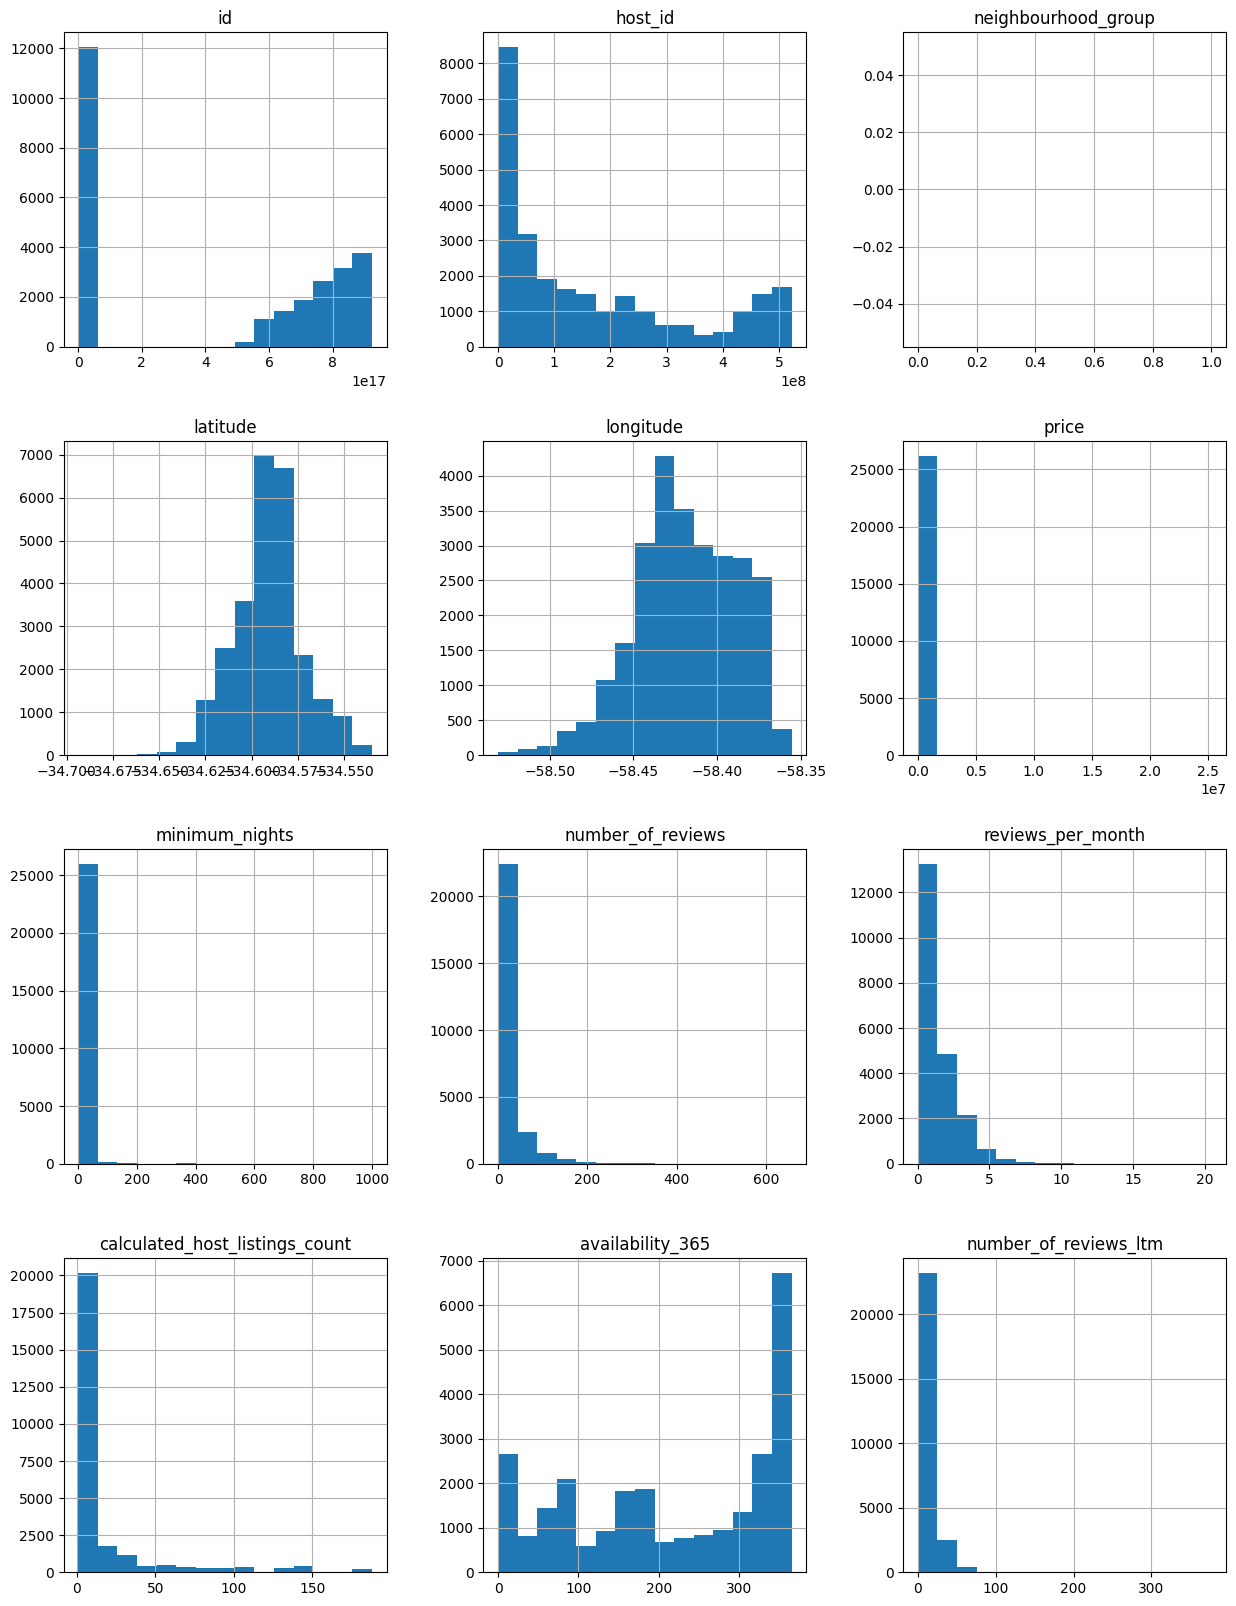

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,20));

###Há Outliers??###

Antes de verificarmos a média dos preços do aluguel, é importante removermos os outliers, como podemos ver na concentração das informaçoes nas variáveis `price`, `minimum_nights`, etc.

* Resumo estatístico por meio do `describe`
* Plotar `boxplot` para a variável.

In [12]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,2.620400e+04,26204.000000,26204.000000,26204.000000
mean,1.752933e+04,6.300145,21.823386,213.903335
std,1.754018e+05,24.286468,38.715892,127.418208
min,1.750000e+02,1.000000,0.000000,0.000000
25%,7.406500e+03,2.000000,1.000000,89.000000
50%,1.019000e+04,3.000000,7.000000,227.000000
75%,1.528600e+04,4.000000,25.000000,342.000000
max,2.529509e+07,1000.000000,657.000000,365.000000


Com base no resumo fornecido, conseguimos identificar que:
* O preço médio é de aproximadamente 17 mil, mas o valor máximo é de aproximadamente 25 milhões. Ainda, 75% dos valores estão abaixo de 15 mil.
* Para a variável `minimum_nights`, o cenário é similar, onde a média é de 6 noites e 75% dos valores são abaixo de 4 noites, mas o valor máximo é de 1 mil.

Com base nessas informações, o ideal é analisarmos as variáveis `price` e `minimum_nights` em específico com um *boxplot* a fim de tratar os *outliers*.

###Boxplot para minimum_nights

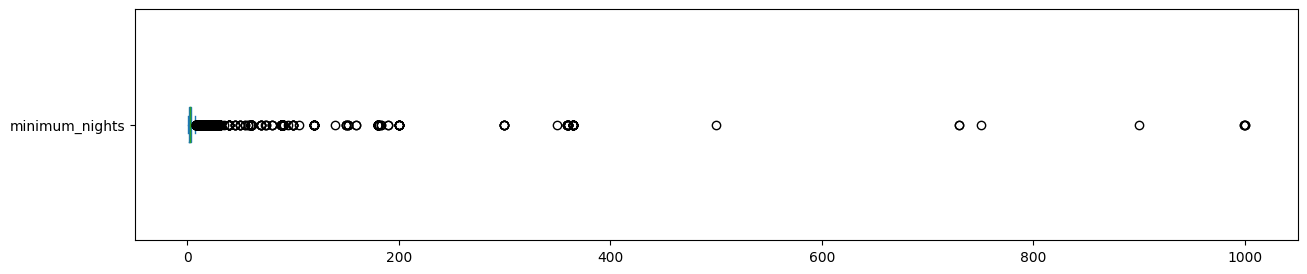

minimum_nights: valores acima de 85:
267 entradas
1.0189%


In [28]:
  # minimum_nights boxplot
  df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
  plt.show()

  #ver a quantidade de valores acima de 30 noites para minimum_nights
  print("minimum_nights: valores acima de 85:")
  print("{} entradas".format(len(df[df.minimum_nights > 85])))
  print("{:.4f}%".format((len(df[df.minimum_nights >85])/df.shape[0])*100))


### Boxplot para Price

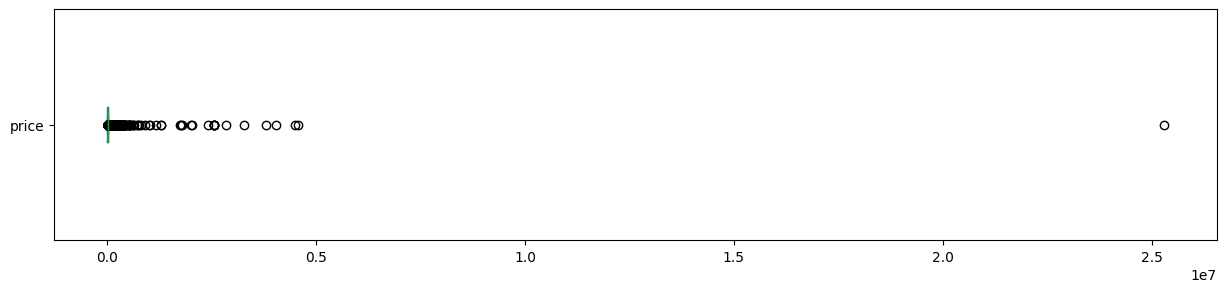

price: valores acima de 80 mil:
267 entradas
1.0189%


In [34]:
 # boxplot para price
 df.price.plot(kind='box', vert=False, figsize=(15,3))
 plt.show()

 #ver a quantidade de valores acima de 80.000 mil
 print("price: valores acima de 80 mil:")
 print("{} entradas".format(len(df[df.price > 80000])))
 print("{:.4f}%".format((len(df[df.price > 80000])/df.shape[0])*100))


### Histograma sem *Outliers*

Agora que já identificamos os *outliers* nas variavéis `price` e `minimum_nights`, vmaos limpar o DataFrame delas e plotar novamente o histograma para nova análise.

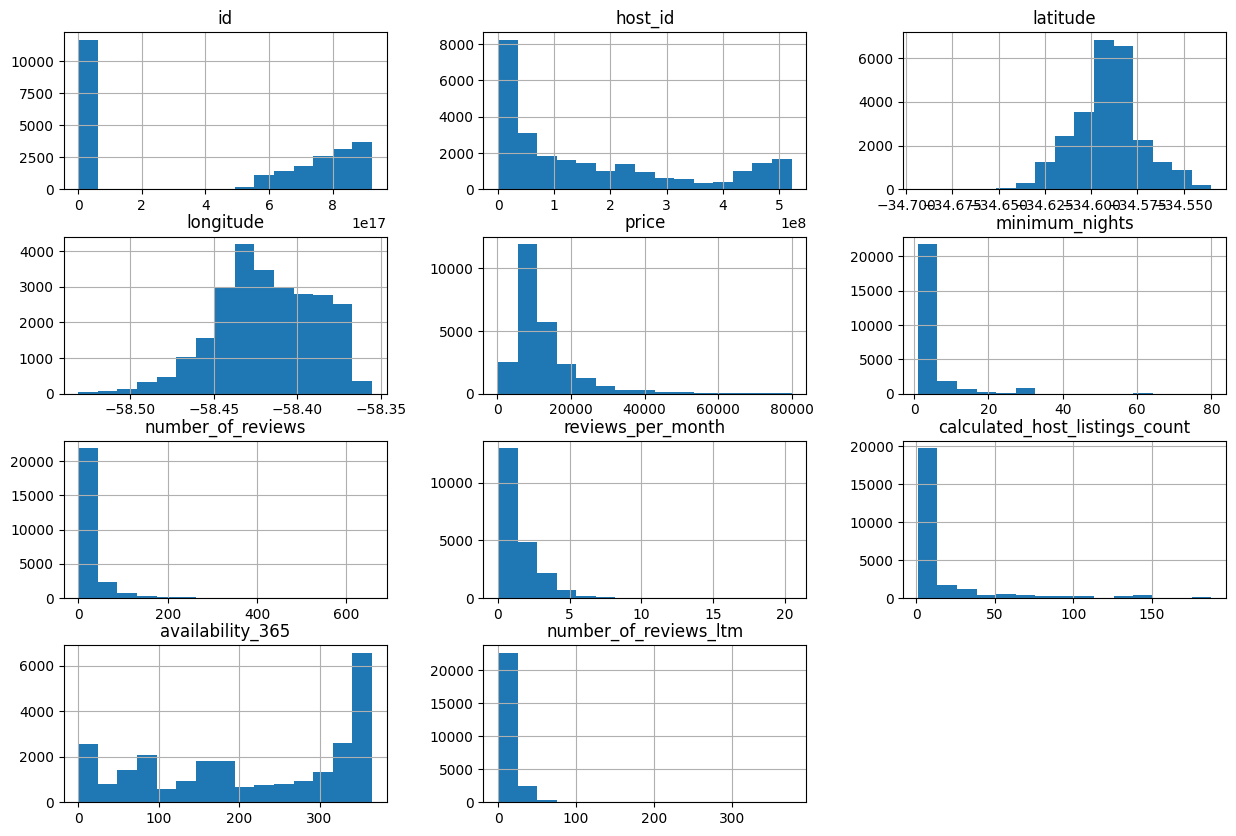

In [36]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 80000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 85].index, axis=0, inplace=True)

# remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group',axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Agora que conseguimos remover os *outliers* e temos um DataFrame limpo, vamos calcular a média dos preços para a cidade de Buenos Aires.

In [45]:
# ver a média da coluna `price``
print("A média dos preços é: {:.2f}$".format((df_clean['price']).mean()))

A média dos preços é: 12850.75$


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [47]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014960,-0.033666,-0.092325,0.079951,0.029180
minimum_nights,-0.014960,1.000000,-0.099704,-0.229313,-0.009992,-0.042350
number_of_reviews,-0.033666,-0.099704,1.000000,0.296332,-0.032724,-0.032053
reviews_per_month,-0.092325,-0.229313,0.296332,1.000000,0.078874,0.061175
calculated_host_listings_count,0.079951,-0.009992,-0.032724,0.078874,1.000000,0.051775
availability_365,0.029180,-0.042350,-0.032053,0.061175,0.051775,1.000000


Com base nas informações mostradas na tabela acima, conseguimos identificar que  existe pouca correlação entre os dados estudados. Para facilitar a visualização, vamos verificar o gráfico abaixo:

<Axes: >

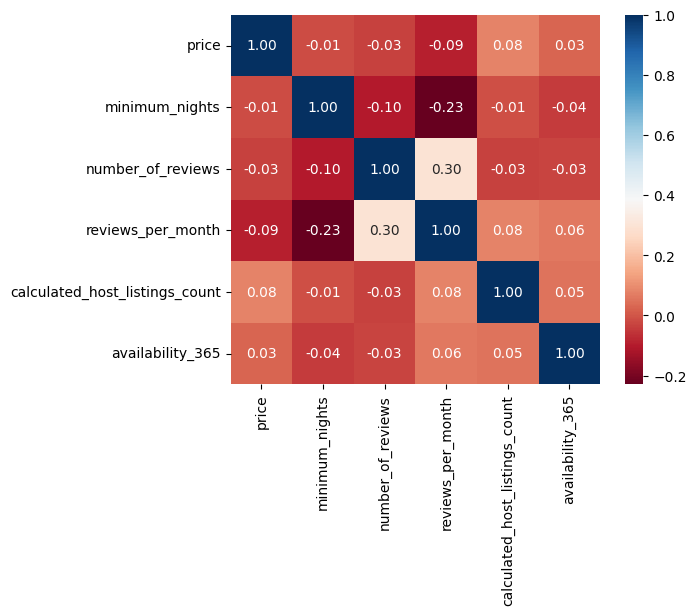

In [49]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)


O que pode-se extrair é:

* Existe uma correlação de 30% entre o número de reviews (`number_of_reviews`) e as revisões por mês (`reviews_per_month`).



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [51]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    23111
Private room        2270
Shared room          199
Hotel room            98
Name: room_type, dtype: int64

In [60]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/ df_clean.shape[0])*100

Entire home/apt    90.003116
Private room        8.840252
Shared room         0.774982
Hotel room          0.381650
Name: room_type, dtype: float64

Logo, se constata que a maior quantidade de imóveis disponíveis para aluguel em Buenos Aires é do tipo "Casa inteira", seguido de apenas um quarto ("Private room").

### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros `(neighbourhoods)` a partir do preço de locação.


In [61]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    27776.484429
Villa Real       17647.375000
Floresta         14775.783784
Retiro           14773.939123
Villa Devoto     14420.022222
Palermo          14399.987577
Recoleta         13858.022769
Colegiales       12848.154351
Belgrano         12790.144420
Nuñez            12366.493243
Name: price, dtype: float64

Neste caso, vemos que Puerto Madero é o bairro mais caro para locação de imóveis em Buenos Aires, seguido da Villa Real e depois com uma proximidade muito grande dos restantes (Flores, Retiro, villa Devoto, etc).

Mas ainda, é importante verificarmos a quantidade de entredas para essas localidades a fim de garantir a confiabilidade dos dados

In [64]:
# ver quantidade de imoveis em Puerto Madero
print(df_clean[df_clean.neighbourhood == "Puerto Madero"].shape)

# ver as entradas de Puerto Madero
df_clean[df_clean.neighbourhood == "Puerto Madero"]

(289, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
77,104343,Aparthotel in Buenos Aires · ★4.91 · 1 bedroom...,542973,Stay,Puerto Madero,-34.602200,-58.355410,Hotel room,45991,1,185,2023-01-20,1.31,1,0,19,NaN
232,396509,Rental unit in Buenos Aires · ★4.86 · 1 bedroo...,1443812,Luciana,Puerto Madero,-34.612540,-58.362410,Entire home/apt,25950,1,115,2023-06-20,1.12,2,227,56,NaN
340,699486,Rental unit in Buenos Aires · ★4.91 · 1 bedroo...,719967,Nicolas,Puerto Madero,-34.620210,-58.360150,Entire home/apt,20381,5,26,2021-06-24,0.23,1,306,0,NaN
825,1993035,Rental unit in Buenos Aires · ★5.0 · 1 bedroom...,8904846,Claudio,Puerto Madero,-34.610140,-58.362210,Entire home/apt,27882,14,11,2022-05-01,0.10,1,358,0,NaN
852,2059189,Rental unit in Buenos Aires / Puerto Madero · ...,908033,Heidi,Puerto Madero,-34.619120,-58.361200,Entire home/apt,20381,1,13,2020-03-18,0.12,1,236,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25734,913775784215727775,Rental unit in Buenos Aires · ★New · 2 bedroom...,149687986,Jean & Fernando,Puerto Madero,-34.612200,-58.362460,Entire home/apt,48544,1,2,2023-06-27,2.00,56,338,2,NaN
25761,914234259889989036,Rental unit in Buenos Aires · ★New · 2 bedroom...,519440361,Veronica,Puerto Madero,-34.620027,-58.365027,Entire home/apt,19107,2,0,NaN,NaN,1,261,0,NaN
25817,915212573717865533,Rental unit in Buenos Aires · ★New · 2 bedroom...,149687986,Jean & Fernando,Puerto Madero,-34.617198,-58.361888,Entire home/apt,20121,1,1,2023-06-21,1.00,56,347,1,NaN
26109,920964685047064984,Rental unit in Buenos Aires · ★New · 1 bedroom...,424351174,Ve,Puerto Madero,-34.619727,-58.360511,Entire home/apt,43819,1,0,NaN,NaN,1,270,0,NaN


Desse modo vemos que os dados apresentam uma representatividade adequada de 289 linhas.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

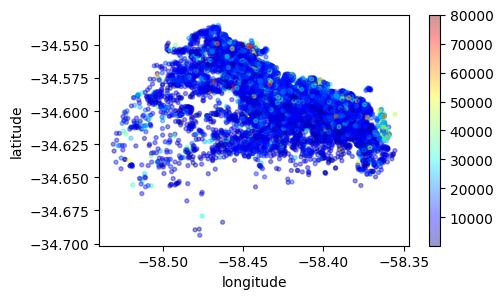

In [68]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(5,3));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [69]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['minimum_nights']).price.mean().sort_values(ascending=False)[:10]

minimum_nights
75    32632.000000
23    25596.857143
45    25357.000000
80    24017.500000
27    23031.500000
35    22550.000000
16    21699.750000
70    17532.200000
8     17376.641026
32    16729.000000
Name: price, dtype: float64

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.